Found 17 sample types with 24 total datasets to analyze.
Dataframe filtered to 1 from 24 total datasets


,file,sample,start_seq,end_seq,peptide_range,charge,peptide
10,pep123_2_LO.xlsx,pep123_LO,1,15,0001-0015,2,PLGVAPTKAKRRVVQ


Saving config parameters to output_03Jan2024\hdxms_params_03Jan2024.py

Using user specified number of populations when available

Dataset 1 of 1
Performing fits for pep123_LO 0001-0015: PLGVAPTKAKRRVVQ z=2
saving figure as  hdx_ms_hxex3_pep123_LO0001-0015binom_isotope_p05_IndFits_bootNoise0p01_03Jan2024


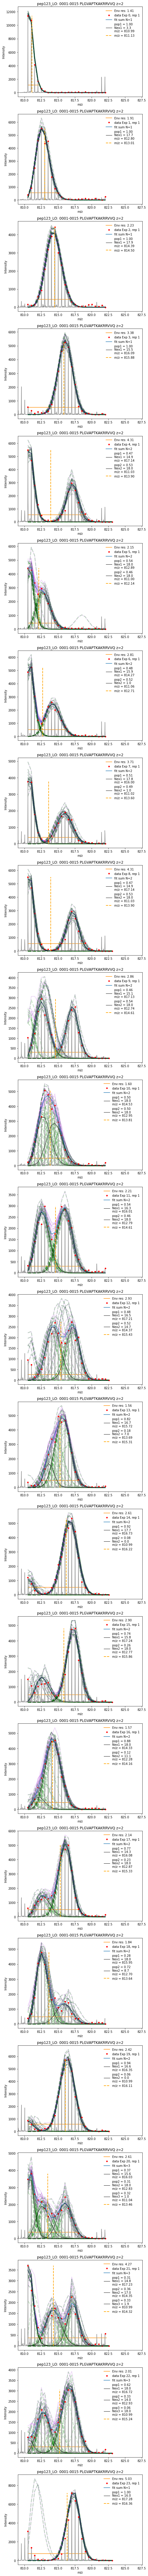

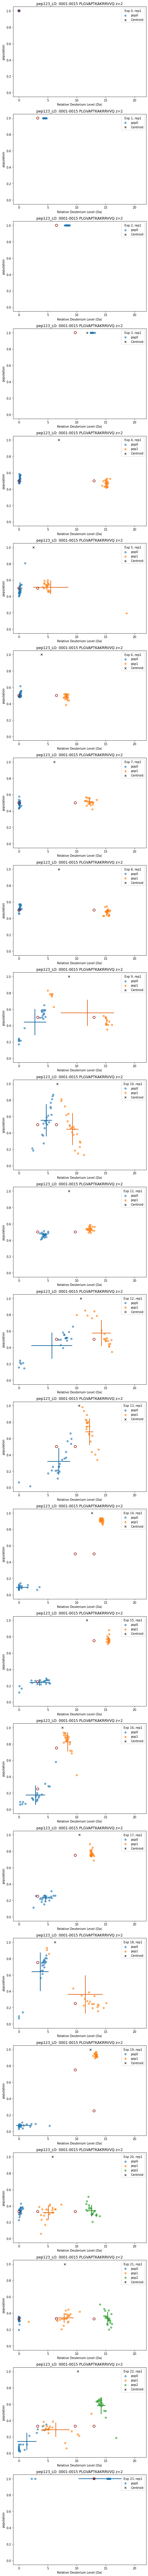

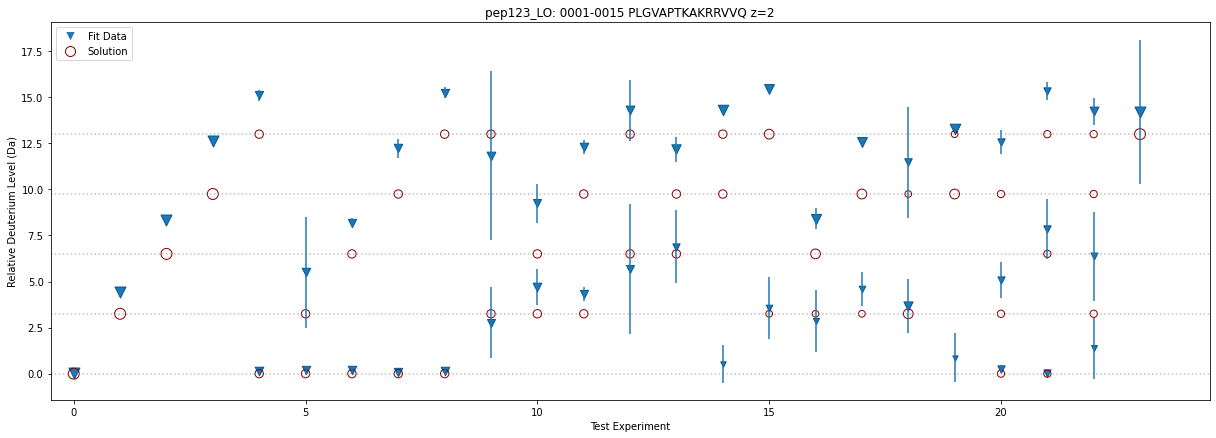

saving figure as  hdx_ms_hxex3_pep123_LO0001-0015binom_isotope_p05_BootFits_bootNoise0p01_03Jan2024
saving figure as  hdx_ms_hxex3_pep123_LO0001-0015binom_isotope_p05_ndeutBoot_bootNoise0p01_03Jan2024
Saving results table to C:\Users\tuttl\OneDrive\Documents\My Documents\KlevitHahn\hdx-ms\pyHXExpress\Bimodal_HDX_Data\output_03Jan2024\data_fits03Jan2024.csv


In [70]:
import os
import importlib
import pyhxexpress as hxex
import numpy as np, pandas as pd
#import config  
#import hdxms_params_22Dec2023 as config
import test_config as config

importlib.reload(hxex)
importlib.reload(config)
hxex.config = config

#help(hxex)

hxex.config.Hide_Figure_Output = False

metadf = hxex.get_metadf()
#metadf = metadf[0:1]
filtered = hxex.filter_metadf(metadf,index=10)#[*range(0,50)],charge=2, samples='B1B5')
display(filtered)
hxex.run_hdx_fits(filtered)

In [71]:
hxex.config_df
#filter_metadf(hxex.config_df,samples='pep123_LO',peptides=peptide,charge=charge,rep=j)['fit_npops'][0]

,time,sample,peptide,charge,rep,peptide_range,fit_npops,solution_npops
0,0.0,LeuEnk_HI,YGGFL,1,1,0001-0005,1.0,1.0
1,1000000.0,LeuEnk_HI,YGGFL,1,1,0001-0005,1.0,1.0
2,60.0,LeuEnk_HI,YGGFL,1,1,0001-0005,1.0,1.0
3,120.0,LeuEnk_HI,YGGFL,1,1,0001-0005,1.0,1.0
4,180.0,LeuEnk_HI,YGGFL,1,1,0001-0005,1.0,1.0
...,...,...,...,...,...,...,...,...
561,19.0,pep42_LO,RDKVQKEYALFYKLD,3,1,0001-0015,2.0,2.0
562,20.0,pep42_LO,RDKVQKEYALFYKLD,3,1,0001-0015,3.0,3.0
563,21.0,pep42_LO,RDKVQKEYALFYKLD,3,1,0001-0015,3.0,3.0
564,22.0,pep42_LO,RDKVQKEYALFYKLD,3,1,0001-0015,3.0,3.0


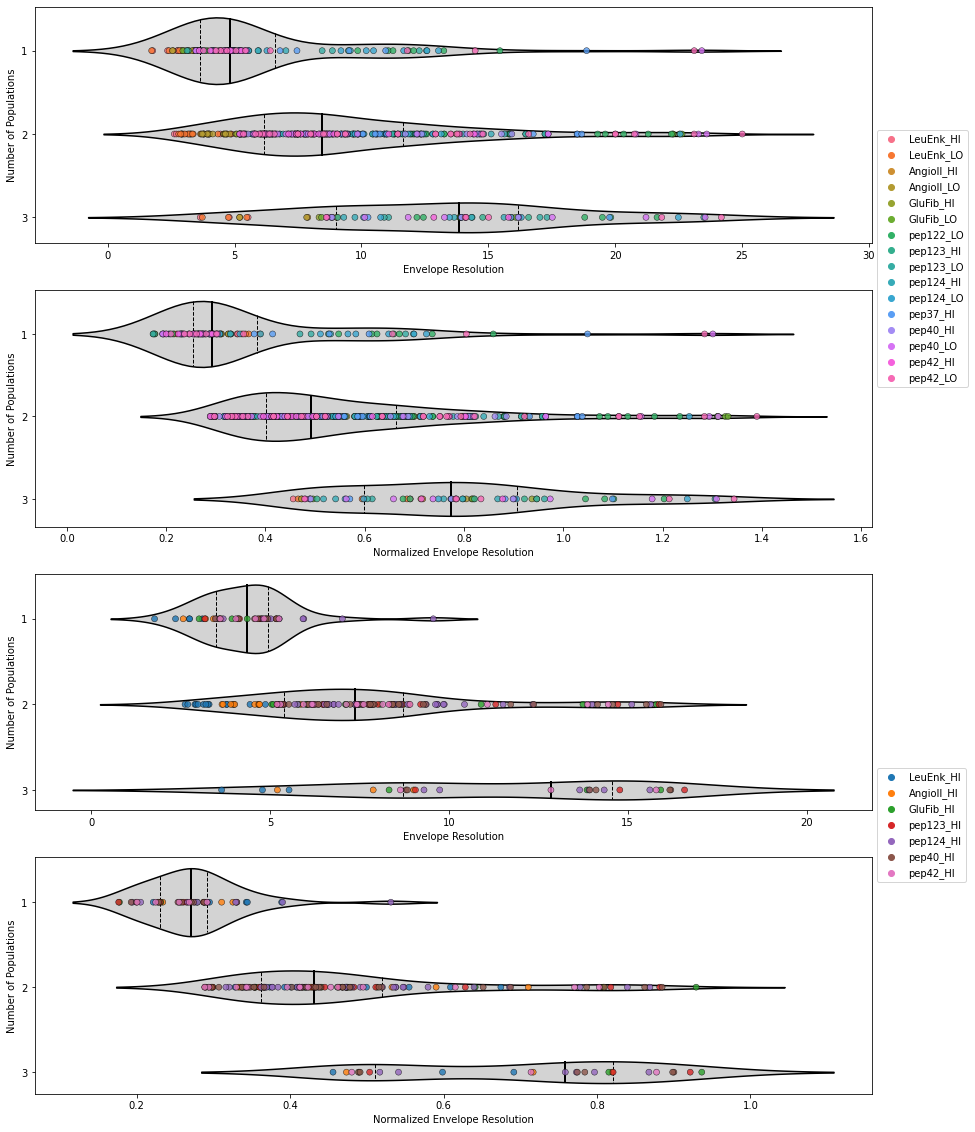

In [156]:
#this would clean up if plotted ~real~ envelopes instead of measured 

# env_res_1 = env_symmetry_adj *charge * (env[1]-env[0]) / ( 2.0 )
# env_symmetry_adj = 2.0 - (y.max() - env_Int)/y.max() # 0 -> assym, 1 -> symm  
                                                       # want 0 to be 2x and 1 to be 1x -> y = -1*x + 2

import seaborn as sns
import matplotlib.pyplot as plt

def patch_edges():
    from matplotlib.collections import PolyCollection
    
    for a in ax.flatten():
        for l in a.lines: #all
            l.set_color('black')
            l.set_linestyle('--')
            l.set_linewidth(1.0)
        for l in a.lines[1::3]: #center
            l.set_linestyle('-')
            l.set_linewidth(2.0)
        for art in a.get_children():
            if isinstance(art,PolyCollection):
                art.set_edgecolor((0.0,0.0,0.0))


all_data = hxex.data_fits.copy()
all_data = all_data[~all_data['sample'].str.contains('Brady')] #bradykinin data is rubbish
all_data['env_res_norm'] = all_data[['env_res_1','peptide']].apply(lambda x: x['env_res_1']/(len(x['peptide'])+3.0),axis=1)

hi_data = all_data.copy()[all_data['sample'].str.contains("HI")]
hi_data = hi_data[~hi_data['sample'].str.contains("pep37")]

fig, ax = plt.subplots(figsize=(15,20), ncols=1, nrows = 4,)# squeeze=False)

sns.violinplot(data=all_data,x='env_res_1',y='solution_npops',orient='h',order=(0,1,2,3,4),ax=ax[0],inner='quart',color='lightgrey')#color='white')
sns.scatterplot(data=all_data,x='env_res_1',y='solution_npops',hue='sample',ax=ax[0],legend=True,zorder=10,edgecolor='black',alpha=0.8)

sns.violinplot(data=hi_data,x='env_res_1',y='solution_npops',orient='h',order=(0,1,2,3,4),ax=ax[2],inner='quart',color='lightgrey');
sns.scatterplot(data=hi_data,x='env_res_1',y='solution_npops',marker='o',hue='sample',ax=ax[2],zorder=10,edgecolor='black',alpha=0.8);


sns.violinplot(data=all_data,x='env_res_norm',y='solution_npops',orient='h',order=(0,1,2,3,4),ax=ax[1],inner='quart',color='lightgrey')
sns.scatterplot(data=all_data,x='env_res_norm',y='solution_npops',hue='sample',ax=ax[1],legend=False,zorder=10,edgecolor='black',alpha=0.8)

sns.violinplot(data=hi_data,x='env_res_norm',y='solution_npops',orient='h',order=(0,1,2,3,4),ax=ax[3],inner='quart',color='lightgrey');
sns.scatterplot(data=hi_data,x='env_res_norm',y='solution_npops',marker='o',hue='sample',ax=ax[3],zorder=10,legend=False,edgecolor='black',alpha=0.8);

ax[0].legend(loc='upper left',bbox_to_anchor=(1,0.5))
ax[2].legend(loc='upper left',bbox_to_anchor=(1,0.2));
for i in range(4):
    if i%2 == 0: ax[i].set_xlabel('Envelope Resolution')
    else: ax[i].set_xlabel('Normalized Envelope Resolution')
    ax[i].set_ylabel('Number of Populations')

patch_edges()


In [229]:


#Write / Read dataframe containing populations columns based on total results (easy way to have all datasets and timepts)

hi_data['fit_npops'] = hi_data['solution_npops']
saveto = os.path.join(config.Output_DIR,'testHI_data_fits.csv')
hi_data.to_csv(saveto,index_label='Index')

read_data_results = pd.read_csv(saveto).drop('Index',axis=1)

#examples of manually changing the fit_npops values based on selection
testidx = hxex.filter_metadf(hi_data,charge=2,timept=0,rep=1).index#['solution_npops'][0]
testidx2 = hxex.filter_metadf(hi_data,charge=3,timept=0,rep=1).index#['solution_npops'][0]
testdf = hi_data.copy()
testdf['pop'] = np.nan
testdf.loc[testidx,'pop'] = 2
testdf.loc[testidx2,'pop']= 3
testdf.loc[testidx | testidx2]

Dataframe filtered to 4 from 207 total datasets
Dataframe filtered to 3 from 207 total datasets


,time,rep,centroid,sample,peptide,peptide_range,charge,solution_npops,env_res_1,icentroid_1,...,iNex_std_2,icentroid_3,ipop_3,ipop_std_3,imu_3,iNex_3,iNex_std_3,env_res_norm,fit_npops,pop
47,0,1,524.090048,AngioII_HI,DRVYIHPF,0001-0008,2,1,2.574674,524.098315,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.234061,1,2.0
118,0,1,786.335332,GluFib_HI,EGVNDNEEGFFSAR,0001-0014,2,1,3.018507,786.295497,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.177559,1,2.0
213,0,1,811.018411,pep123_HI,PLGVAPTKAKRRVVQ,0001-0015,2,1,3.178422,810.985912,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.176579,1,2.0
284,0,1,608.746372,pep124_HI,APTKAKRRVVQREKR,0001-0015,3,1,3.500312,608.739298,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.194462,1,3.0
401,0,1,884.061682,pep40_HI,SFNITTSIRDKVQKE,0001-0015,2,1,3.471781,883.990398,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.192877,1,2.0
424,0,1,589.714627,pep40_HI,SFNITTSIRDKVQKE,0001-0015,3,1,3.593416,589.664201,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.199634,1,3.0
495,0,1,639.841395,pep42_HI,RDKVQKEYALFYKLD,0001-0015,3,1,3.609806,639.736005,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.200545,1,3.0


In [21]:
all_deut, all_raw = hxex.get_data(metadf)

In [65]:
#all_deut['solution_npops'] = hxex.solution['npops'][hxex.solution.time==timept].to_numpy()[0]
all_deut['fit_npops'] = np.nan

time_points = sorted(set(all_deut.time))
n_time_points = len(time_points)

for i in time_points:
     filt_idx = hxex.filter_metadf(all_deut,timept=i,quiet=True).index
     all_deut.loc[filt_idx,'fit_npops'] = hxex.solution['npops'][hxex.solution.time==i].to_numpy()[0]

all_deut['solution_npops'] = all_deut['fit_npops']

In [66]:
keep_cols = ['time','sample','peptide','charge','rep','peptide_range','fit_npops','solution_npops']
test_config_df = all_deut.copy()[all_deut.n_deut==0][keep_cols]

In [68]:
#test_config_df.to_csv(os.path.join(config.Data_DIR,'test_config_df.csv'),index_label='Index')